In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
# read csv file into pandas
df = pd.read_csv("quest10.csv")
df.head(20)

,question_id,student_answer,score
0,10,3 سنوات,2
1,10,3,2
2,10,اربع سنوات,0
3,10,5,0
4,10,5سنوات,0
5,10,6,0
6,10,3 اشهر و ستتخلص منها,0
7,10,3 سنوات,2
8,10,20 سنة,0
9,10,20 سنة,0


In [28]:
#EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     107 non-null    int64 
 1   student_answer  107 non-null    object
 2   score           107 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.6+ KB


In [29]:
df.groupby('score').size()

score
0    66
2    41
dtype: int64

In [30]:
df.duplicated().sum()

61

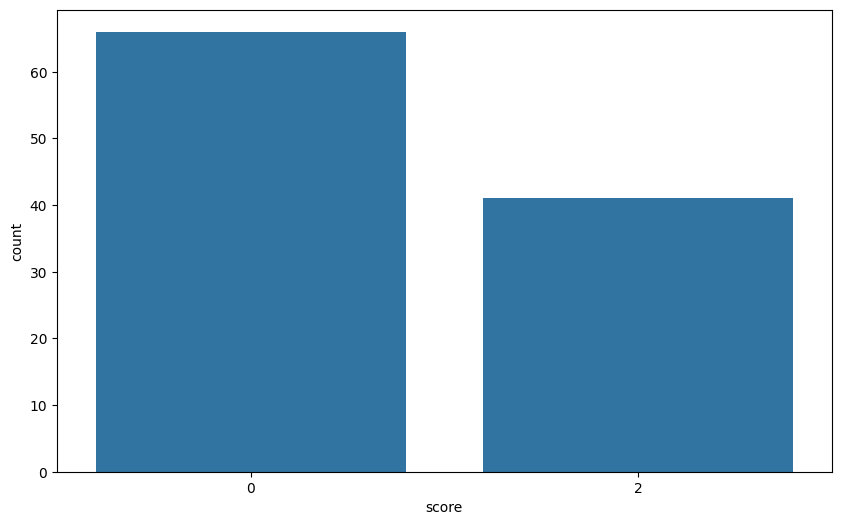

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='score')
plt.show()

In [33]:
import pandas as pd
df = pd.read_csv('./quest10.csv')
df1 = pd.DataFrame.drop_duplicates(df)
df2 = pd.DataFrame(df1)
df2['score'] = df2['score'].apply(lambda x : int(x * 2.5 ))
csv = './question10.csv'
df2.to_csv(csv,index=False)
print(len(df1))

46


In [36]:
df = pd.read_csv("question10.csv")
df.head(20)

,question_id,student_answer,score
0,10,3 سنوات,5
1,10,3,5
2,10,اربع سنوات,0
3,10,5,0
4,10,5سنوات,0
5,10,6,0
6,10,3 اشهر و ستتخلص منها,0
7,10,3 سنوات,5
8,10,20 سنة,0
9,10,20 سنة,0


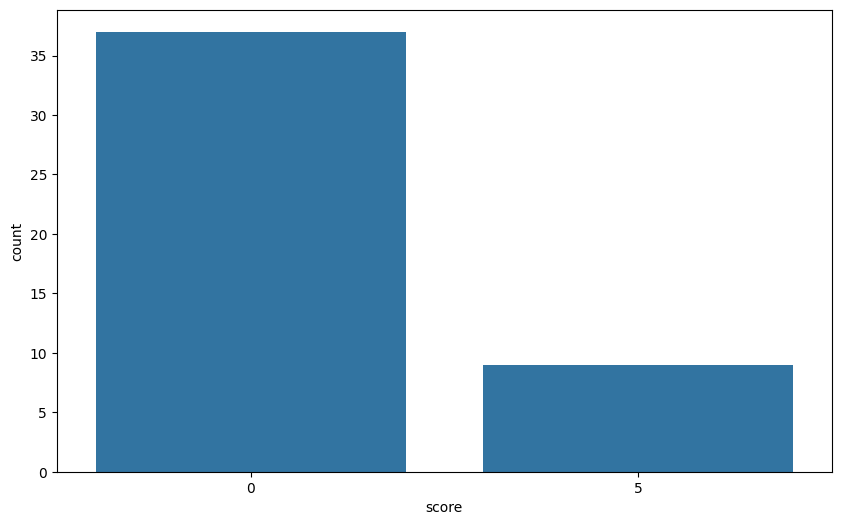

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='score')
plt.show()

In [38]:
def txt_preprocess(text):
    text = text.lower()
    tokens = word_tokenize(text)
    return tokens

In [39]:
import nltk
from nltk.tokenize import word_tokenize

In [40]:
df['tokens'] = df['student_answer'].apply(txt_preprocess)

In [41]:
from gensim.models import Word2Vec

In [42]:
model_word2vec = Word2Vec(df['tokens'], vector_size=100, window=5, min_count=1, workers=4)

In [43]:
def get_word_vector(tokens, model_word2vec):
    textvector = np.zeros((100,), dtype='float32')
    for token in tokens:
        try:
            textvector += model_word2vec.wv[token]
        except KeyError:
            continue
    return textvector


df['textvector'] = df['tokens'].apply(lambda x: get_word_vector(x, model_word2vec))

In [44]:
df.head(5)

,question_id,student_answer,score,tokens,textvector
0,10,3 سنوات,5,"[3, سنوات]","[-0.009154014, 0.003906142, 0.010291641, 0.014..."
1,10,3,5,[3],"[-0.008618447, 0.0036694543, 0.0051883613, 0.0..."
2,10,اربع سنوات,0,"[اربع, سنوات]","[0.009234861, 0.008401661, 0.0063846614, 0.014..."
3,10,5,0,[5],"[0.007088797, -0.00156793, 0.007947499, -0.009..."
4,10,5سنوات,0,[5سنوات],"[0.0013325238, 0.0065408563, 0.009984603, 0.00..."
